PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [1]:
!!pip install dataprep

['Collecting dataprep',
 '  Using cached dataprep-0.4.1-py3-none-any.whl (3.5 MB)',
 'Requirement already satisfied: aiohttp<4.0,>=3.6 in c:\\users\\sushm\\anaconda3\\lib\\site-packages (from dataprep) (3.8.5)',
 'Collecting bokeh<3,>=2 (from dataprep)',
 '  Using cached bokeh-2.4.3-py3-none-any.whl (18.5 MB)',
 'Requirement already satisfied: bottleneck<2.0,>=1.3 in c:\\users\\sushm\\anaconda3\\lib\\site-packages (from dataprep) (1.3.5)',
 'Collecting dask[array,dataframe,delayed]<3.0,>=2.25 (from dataprep)',
 '  Using cached dask-2.30.0-py3-none-any.whl (848 kB)',
 'Collecting flask<2.0.0,>=1.1.4 (from dataprep)',
 '  Using cached Flask-1.1.4-py2.py3-none-any.whl (94 kB)',
 'Collecting flask_cors<4.0.0,>=3.0.10 (from dataprep)',
 '  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl (14 kB)',
 'Collecting ipywidgets<8.0,>=7.5 (from dataprep)',
 '  Obtaining dependency information for ipywidgets<8.0,>=7.5 from https://files.pythonhosted.org/packages/14/3f/fa7fcf85061819f5a10ed09eaef3

In [4]:
!!pip install tensorflow

['Requirement already satisfied: tensorflow in c:\\users\\sushm\\anaconda3\\lib\\site-packages (2.15.0)',
 'Requirement already satisfied: tensorflow-intel==2.15.0 in c:\\users\\sushm\\anaconda3\\lib\\site-packages (from tensorflow) (2.15.0)',
 'Requirement already satisfied: absl-py>=1.0.0 in c:\\users\\sushm\\anaconda3\\lib\\site-packages (from tensorflow-intel==2.15.0->tensorflow) (2.1.0)',
 'Requirement already satisfied: astunparse>=1.6.0 in c:\\users\\sushm\\anaconda3\\lib\\site-packages (from tensorflow-intel==2.15.0->tensorflow) (1.6.3)',
 'Requirement already satisfied: flatbuffers>=23.5.26 in c:\\users\\sushm\\anaconda3\\lib\\site-packages (from tensorflow-intel==2.15.0->tensorflow) (23.5.26)',
 'Requirement already satisfied: gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 in c:\\users\\sushm\\anaconda3\\lib\\site-packages (from tensorflow-intel==2.15.0->tensorflow) (0.5.4)',
 'Requirement already satisfied: google-pasta>=0.1.1 in c:\\users\\sushm\\anaconda3\\lib\\site-packages (from te

In [28]:
!!pip install tensorflow-gpu

['Collecting tensorflow-gpu',
 '  Downloading tensorflow-gpu-2.12.0.tar.gz (2.6 kB)',
 '  Preparing metadata (setup.py): started',
 "  Preparing metadata (setup.py): finished with status 'error'",
 '  error: subprocess-exited-with-error',
 '  ',
 '  python setup.py egg_info did not run successfully.',
 '  exit code: 1',
 '  ',
 '  [44 lines of output]',
 '  Traceback (most recent call last):',
 '    File "C:\\Users\\sushm\\anaconda3\\Lib\\site-packages\\setuptools\\_vendor\\packaging\\requirements.py", line 35, in __init__',
 '      parsed = _parse_requirement(requirement_string)',
 '               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^',
 '    File "C:\\Users\\sushm\\anaconda3\\Lib\\site-packages\\setuptools\\_vendor\\packaging\\_parser.py", line 64, in parse_requirement',
 '      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))',
 '             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^',
 '    File "C:\\Users\\sushm\\anaconda3\\Lib\\site-packages\\se

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [9]:
data=pd.read_csv("forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [37]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.731141
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()
data["size_category"]=le.fit_transform(data["size_category"])

In [13]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [21]:
X=data.iloc[:,2:10]
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [22]:
y=data.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: size_category, dtype: int32

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((413, 8), (104, 8), (413,), (104,))

In [29]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=8,  activation='relu')) #1st layer
model.add(Dense(10,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #output layer

In [30]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
# Fit the model
h = model.fit(X_train, Y_train, validation_split=0.2, epochs=70, batch_size=32)

# evaluate the model on train data
scores = model.evaluate(X_train, Y_train)
print(model.metrics_names[1], scores[1]*100)

Epoch 1/70


11/11 [==============================] - 4s 72ms/step - loss: 46.4697 - accuracy: 0.2788 - val_loss: 25.7963 - val_accuracy: 0.3735
Epoch 2/70
11/11 [==============================] - 0s 16ms/step - loss: 18.1070 - accuracy: 0.4303 - val_loss: 9.6580 - val_accuracy: 0.6386
Epoch 3/70
11/11 [==============================] - 0s 14ms/step - loss: 8.6145 - accuracy: 0.6303 - val_loss: 8.4040 - val_accuracy: 0.6988
Epoch 4/70
11/11 [==============================] - 0s 16ms/step - loss: 7.8336 - accuracy: 0.7061 - val_loss: 6.9021 - val_accuracy: 0.6867
Epoch 5/70
11/11 [==============================] - 0s 14ms/step - loss: 6.5247 - accuracy: 0.6242 - val_loss: 5.9150 - val_accuracy: 0.6747
Epoch 6/70
11/11 [==============================] - 0s 14ms/step - loss: 5.6133 - accuracy: 0.6061 - val_loss: 5.2775 - val_accuracy: 0.6988
Epoch 7/70
11/11 [==============================] - 0s 13ms/step - loss: 5.1147 - accuracy: 0.6303 - val_loss: 4.8684 - val_accuracy: 0.7229
Epoch 8/

In [32]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

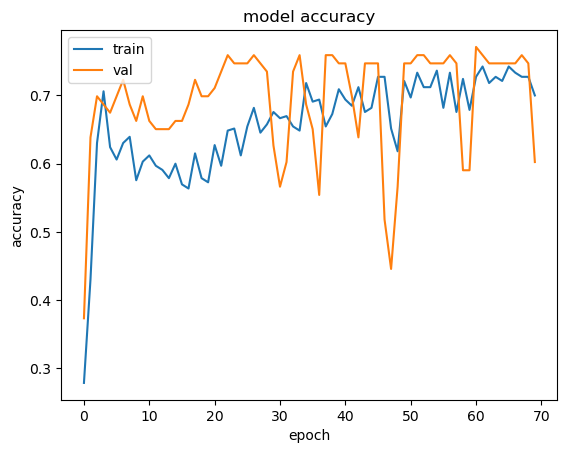

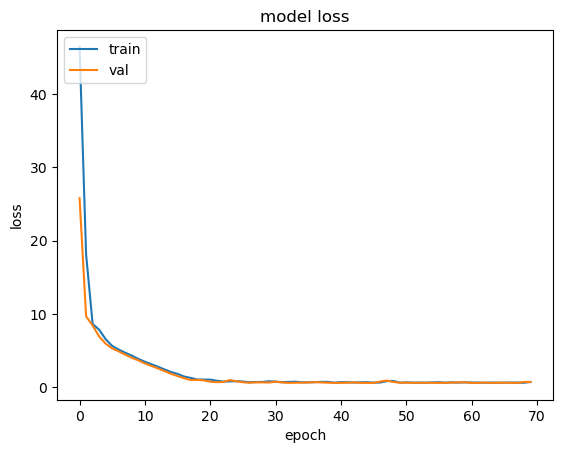

In [34]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [35]:
# evaluate the model on test data
scores =model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 6ms/step - loss: 0.7636 - accuracy: 0.5096
accuracy: 50.96%
